# 머신러닝 프레임워크 : scikit-learn
: 다양한 분류기를 지원하며, 검증하는 기능, 분류, 회귀, 클러스터링, 차원 축소법이 가능하면 샘플 데이터로 재공한다

In [2]:
# XOR 연산 학습
# (0,0) => 1, (1,1) => 1, 같은 값일 때 0 반환
xor_input =[
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0],
]
xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [3]:
import pandas as pd
xor_df = pd.DataFrame(xor_input)
# 문제 만들기 
xor_data = xor_df.iloc[:,0:2]  # feature column
# 정답 
xor_label = xor_df.iloc[:,2]  # target column
xor_label

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [4]:
# 데이터 학습과 예측하기 
from sklearn import svm, metrics

clf = svm.SVC()
# 공부시킨다
# 지도학습
clf.fit(xor_data,xor_label)
pred = clf.predict(xor_data)
print(pred)

[0 1 1 0]


In [5]:
# 정답률 구하기 
ac_score = metrics.accuracy_score(xor_label, pred)
print("정답률 :",ac_score)

정답률 : 1.0


In [6]:
# 정답률 구하기 : predict를 구하지 않고 정답률 구하기
# 과대적합인지 과소적합인지 확인, 예측률과 연관앖음 
# trainig data 와 test data를 서로 비교함. 1이상이면 과대적합, 1 미만이먄 과소적합 
clf.score(xor_data,xor_label)

1.0

---
### 붓꽃의 품종 분류하기

In [7]:
iris = pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# 기본 통계량 확인
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# NaN 확인
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [11]:
# red,blue, green
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# 이름별로 다른 색깔 컬럼 만들기 
iris['Color'] = ""

In [13]:
iris.Color[iris.Name == "Iris-setosa"] = "red"
iris.Color[iris.Name == "Iris-versicolor"] = "green"
iris.Color[iris.Name == "Iris-virginica"] = "blue"

/var/folders/_z/5lt5f71x2fq6j9898gb_0m000000gn/T/ipykernel_6941/401857139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris.Color[iris.Name == "Iris-setosa"] = "red"
/var/folders/_z/5lt5f71x2fq6j9898gb_0m000000gn/T/ipykernel_6941/401857139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris.Color[iris.Name == "Iris-versicolor"] = "green"
/var/folders/_z/5lt5f71x2fq6j9898gb_0m000000gn/T/ipykernel_6941/401857139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [14]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,blue
146,6.3,2.5,5.0,1.9,Iris-virginica,blue
147,6.5,3.0,5.2,2.0,Iris-virginica,blue
148,6.2,3.4,5.4,2.3,Iris-virginica,blue


In [15]:
# scattor 그려보기 
import matplotlib.pyplot as plt


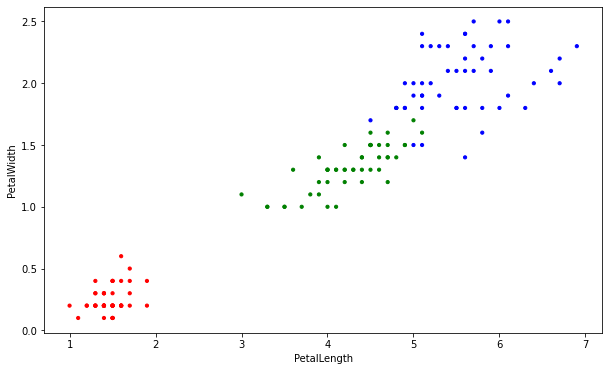

In [16]:
iris.plot(
    kind='scatter',
x="PetalLength",
y= "PetalWidth",
c="Color",  # color 컬럼을 따라 색깔 구분
figsize=(10,6),  # size 
s=10  # size
)
plt.show()

In [17]:
# 머신러닝을 위한 작업
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris_label = iris['Name']
print(iris_data)
print(iris_label)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [18]:
# 학습용 데이터와 텍스트용 데이터로 나누기 
from sklearn.model_selection import train_test_split

train_data, test_data, train_label,test_label= train_test_split(iris_data,iris_label)
print(train_data.head())
print(test_data.head())
print("*"*10)
print(train_label.head())
print(test_label.head())

     SepalLength  SepalWidth  PetalLength  PetalWidth
147          6.5         3.0          5.2         2.0
92           5.8         2.6          4.0         1.2
52           6.9         3.1          4.9         1.5
68           6.2         2.2          4.5         1.5
45           4.8         3.0          1.4         0.3
     SepalLength  SepalWidth  PetalLength  PetalWidth
123          6.3         2.7          4.9         1.8
47           4.6         3.2          1.4         0.2
72           6.3         2.5          4.9         1.5
94           5.6         2.7          4.2         1.3
148          6.2         3.4          5.4         2.3
**********
147     Iris-virginica
92     Iris-versicolor
52     Iris-versicolor
68     Iris-versicolor
45         Iris-setosa
Name: Name, dtype: object
123     Iris-virginica
47         Iris-setosa
72     Iris-versicolor
94     Iris-versicolor
148     Iris-virginica
Name: Name, dtype: object


In [19]:
# 학습시키기 
clf = svm.SVC()
clf.fit(train_data,train_label)


SVC()

In [20]:
# 예측하기 
pred = clf.predict(test_data)
print(pred[0:5])

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']


In [21]:
# 정답률
ac_score = metrics.accuracy_score(test_label,pred)
print("정답률:", ac_score)

정답률: 0.9473684210526315


In [22]:
# training 정답률 
clf.score(train_data,train_label)


0.9821428571428571

In [23]:
# test 정답룰
clf.score(test_data, test_label)

0.9473684210526315

In [24]:
# 분류 Report : confusion matrix
cl_report = metrics.classification_report(test_label,pred)
print(cl_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.95        38
      macro avg       0.94      0.96      0.94        38
   weighted avg       0.96      0.95      0.95        38



In [25]:
# weighted abg = 가중치 평균 

In [26]:
clf.predict([[4.1,3.5,1.4,0.2]])

array(['Iris-setosa'], dtype=object)

---
### 분류 report 이해하기 

## Python Code 확인하기

In [27]:
import numpy as np

In [28]:
# 타겟컬럼은 1로 만든다 
# 음치는 1로 , 정상은 0
y = np.array([1,1,1,1,0,0])  # 정답
p = np.array([1,1,0,0,0,0])  # 예측 
# 정확도 
accuracy = np.mean(np.equal(y,p))
print('accuracy :',accuracy)

# 정밀도 
right = np.sum( y * p ==1)
precision = right / np.sum(p)
print("precision : ",precision)
# 재현율 
recall = right / np.sum(y)
print("recall : ",recall)

# f1 sore 
f1 = 2 * precision * recall/ recall + precision
print('f1 score : ', f1)

accuracy : 0.6666666666666666
precision :  1.0
recall :  0.5
f1 score :  3.0


In [29]:
# sciket
print('accuracy : ', metrics.accuracy_score(y,p))
print('precision : ', metrics.precision_score(y,p))
print('recall : ', metrics.recall_score(y,p))
print('f1 score : ', metrics.f1_score(y,p))

accuracy :  0.6666666666666666
precision :  1.0
recall :  0.5
f1 score :  0.6666666666666666
